<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/DH307_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_sit%20(1).csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


    Time  pleth_1  pleth_2  pleth_3  pleth_4  pleth_5  pleth_6  Unnamed: 7  \
0  0.000    66165    68100     3605    90569    99964     6084         NaN   
1  0.002    66160    68084     3603    90569    99964     6084         NaN   
2  0.004    66149    68081     3606    90571    99960     6082         NaN   
3  0.006    66153    68071     3594    90580    99967     6084         NaN   
4  0.008    66153    68071     3594    90579    99948     6082         NaN   

   Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0         NaN         NaN          NaN          NaN          NaN          NaN   
1         NaN         NaN          NaN          NaN          NaN          NaN   
2         NaN         NaN          NaN          NaN          NaN          NaN   
3         NaN         NaN          NaN          NaN          NaN          NaN   
4         NaN         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 14  Unnamed: 15  
0          NaN

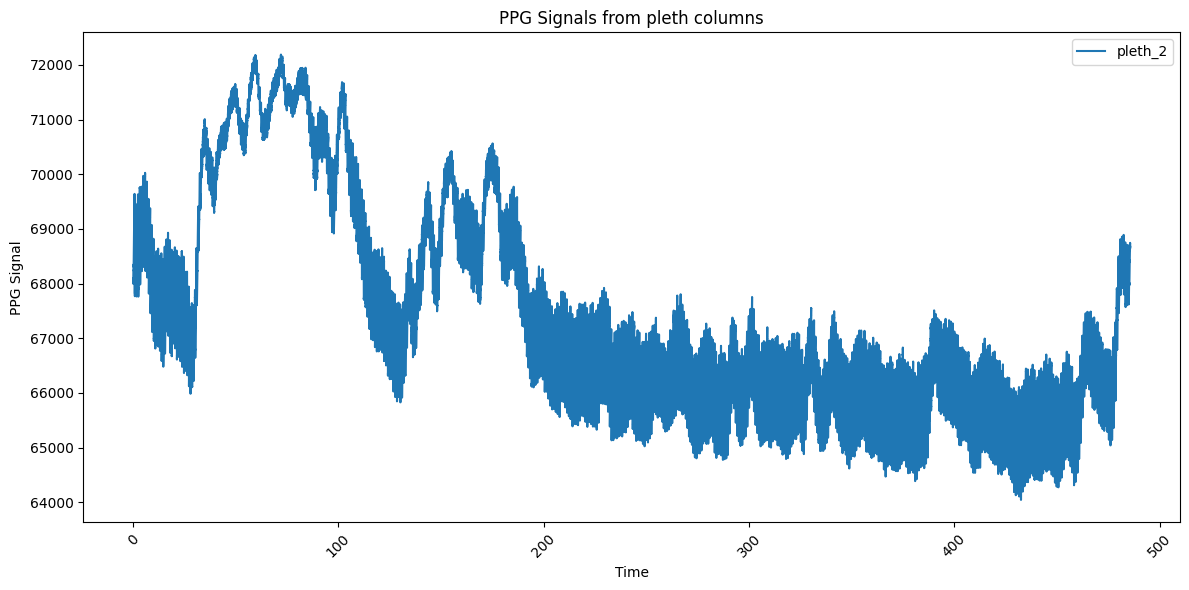

In [3]:
pleth_columns = ['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each pleth signal - comment/uncomment to choose which signals to plot

#plt.plot(df['Time'], df['pleth_1'], label='pleth_1')  # Uncomment to include pleth_1
plt.plot(df['Time'], df['pleth_2'], label='pleth_2')  # Uncomment to include pleth_2
# plt.plot(df['Time'], df['pleth_3'], label='pleth_3')  # Uncomment to include pleth_3
#plt.plot(df['Time'], df['pleth_4'], label='pleth_4')  # Uncomment to include pleth_4
#plt.plot(df['Time'], df['pleth_5'], label='pleth_5')  # Uncomment to include pleth_5
#plt.plot(df['Time'], df['pleth_6'], label='pleth_6')  # Uncomment to include pleth_6

# Customize the plot
plt.xlabel('Time')
plt.ylabel('PPG Signal')
plt.title('PPG Signals from pleth columns')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

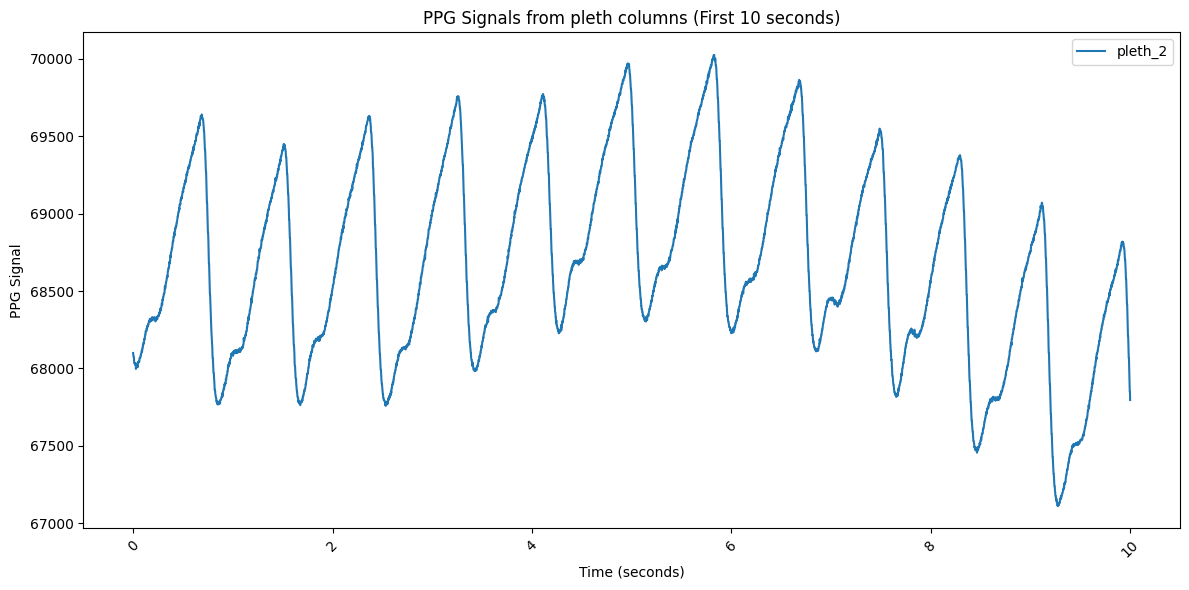

In [5]:
df_10_seconds = df[df['Time'] <= 10]

# List of pleth columns to plot
pleth_columns = ['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each pleth signal - comment/uncomment to choose which signals to plot
#plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_1'], label='pleth_1')  # Uncomment to include pleth_1
plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_2'], label='pleth_2')  # Uncomment to include pleth_2
# plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_3'], label='pleth_3')  # Uncomment to include pleth_3
# plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_4'], label='pleth_4')  # Uncomment to include pleth_4
#plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_5'], label='pleth_5')  # Uncomment to include pleth_5
#plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_6'], label='pleth_6')  # Uncomment to include pleth_6

# Customize the plot
plt.xlabel('Time (seconds)')
plt.ylabel('PPG Signal')
plt.title('PPG Signals from pleth columns (First 10 seconds)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

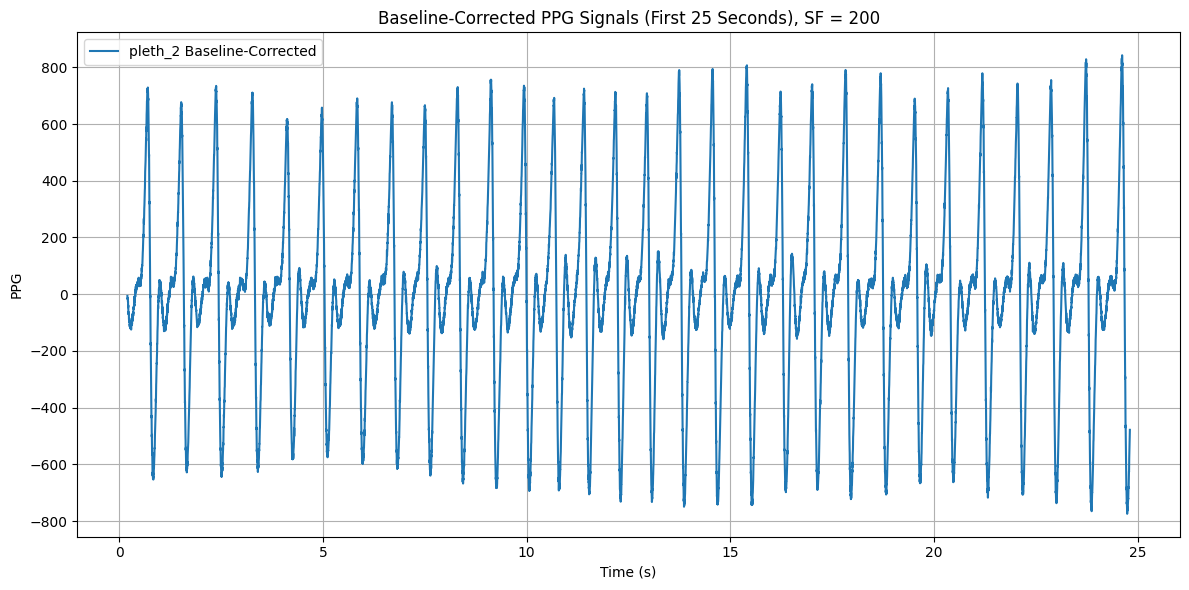

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the time column and pleth columns
time_column = 'Time'
pleth_columns = ['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']

# Function to apply moving average filter
def moving_average(signal, smoothing_factor):
    return signal.rolling(window=smoothing_factor, center=True).mean()

# Define smoothing factor
smoothing_factor = 200  # Adjust for more or less smoothing

# Create a new dataframe to hold the baseline-corrected signals (for the first 25 seconds)
df_filtered = df[df[time_column] <= 25].copy()  # Ensure we are working on a copy, not a view

# Apply the baseline correction to each pleth column
for pleth_col in pleth_columns:
    # Apply the moving average filter to the PPG signal and use .loc to avoid the warning
    df_filtered.loc[:, f'{pleth_col}_Smoothed'] = moving_average(df_filtered[pleth_col], smoothing_factor)

    # Subtract the smoothed signal from the original signal to get the baseline-corrected signal
    df_filtered.loc[:, f'{pleth_col}_Baseline_Corrected'] = df_filtered[pleth_col] - df_filtered[f'{pleth_col}_Smoothed']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each baseline-corrected signal - comment/uncomment to include/exclude specific signals
#plt.plot(df_filtered[time_column], df_filtered['pleth_1_Baseline_Corrected'], label='pleth_1 Baseline-Corrected')  # Uncomment to include pleth_1
plt.plot(df_filtered[time_column], df_filtered['pleth_2_Baseline_Corrected'], label='pleth_2 Baseline-Corrected')  # Uncomment to include pleth_2
# plt.plot(df_filtered[time_column], df_filtered['pleth_3_Baseline_Corrected'], label='pleth_3 Baseline-Corrected')  # Uncomment to include pleth_3
#plt.plot(df_filtered[time_column], df_filtered['pleth_4_Baseline_Corrected'], label='pleth_4 Baseline-Corrected')  # Uncomment to include pleth_4
# plt.plot(df_filtered[time_column], df_filtered['pleth_5_Baseline_Corrected'], label='pleth_5 Baseline-Corrected')  # Uncomment to include pleth_5
#plt.plot(df_filtered[time_column], df_filtered['pleth_6_Baseline_Corrected'], label='pleth_6 Baseline-Corrected')  # Uncomment to include pleth_6

# Customize the plot
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Baseline-Corrected PPG Signals (First 25 Seconds), SF = 200')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
pip install PyWavelets


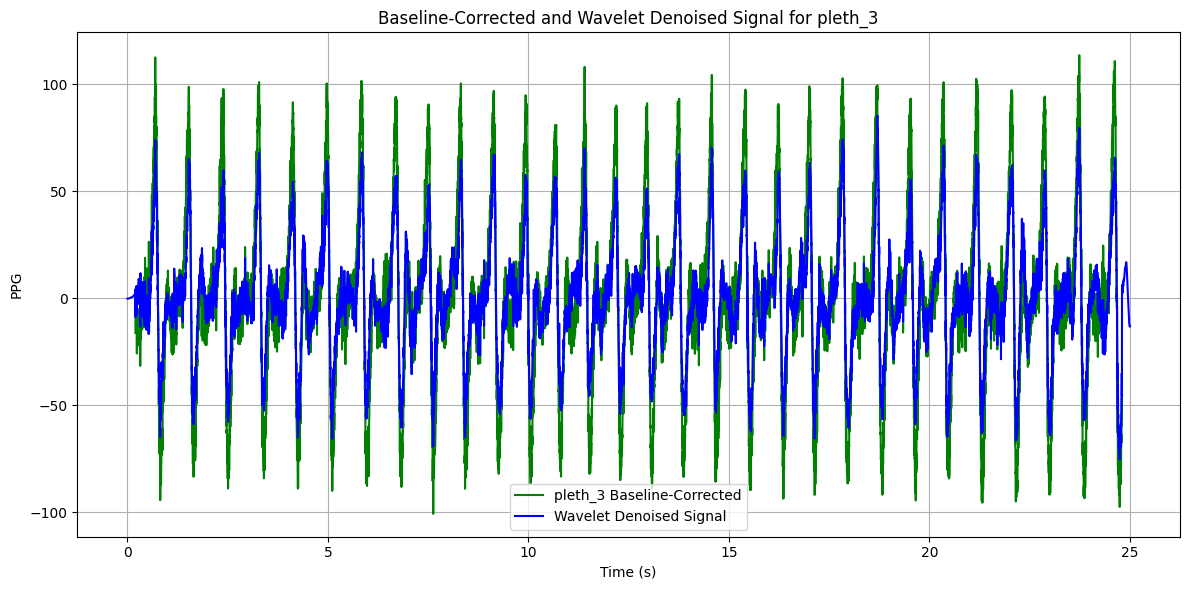

In [47]:
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to apply wavelet denoising
def wavelet_denoise(signal, wavelet='db4', level=1):
    coeffs = pywt.wavedec(signal, wavelet, mode='symmetric')
    coeffs[1:] = [pywt.threshold(c, np.std(c) / 2, mode='soft') for c in coeffs[1:]]
    reconstructed_signal = pywt.waverec(coeffs, wavelet, mode='symmetric')
    return reconstructed_signal[:len(signal)]


# List of pleth columns
pleth_columns = ['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']
#i =int(input("Enter the signal you want to analyse = "))
# Specify which signal to visualize
desired_signal = "pleth_3"  # Change this to 'pleth_3', 'pleth_4', etc.

if f'{desired_signal}_Baseline_Corrected' in df_filtered.columns:
    # Apply wavelet denoising to the baseline-corrected signal
    df_filtered['Denoised_Signal'] = wavelet_denoise(
        df_filtered[f'{desired_signal}_Baseline_Corrected'].fillna(0)
    )

    # Plot the baseline-corrected and denoised signal
    plt.figure(figsize=(12, 6))
    plt.plot(
        df_filtered['Time'],
        df_filtered[f'{desired_signal}_Baseline_Corrected'],
        label=f'{desired_signal} Baseline-Corrected',
        color='green',
    )
    plt.plot(
        df_filtered['Time'],
        df_filtered['Denoised_Signal'],
        label='Wavelet Denoised Signal',
        color='blue',
    )
    plt.xlabel('Time (s)')
    plt.ylabel('PPG')
    plt.title(f'Baseline-Corrected and Wavelet Denoised Signal for {desired_signal}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print(f"ERROR: {desired_signal}_Baseline_Corrected not found in df_filtered.")


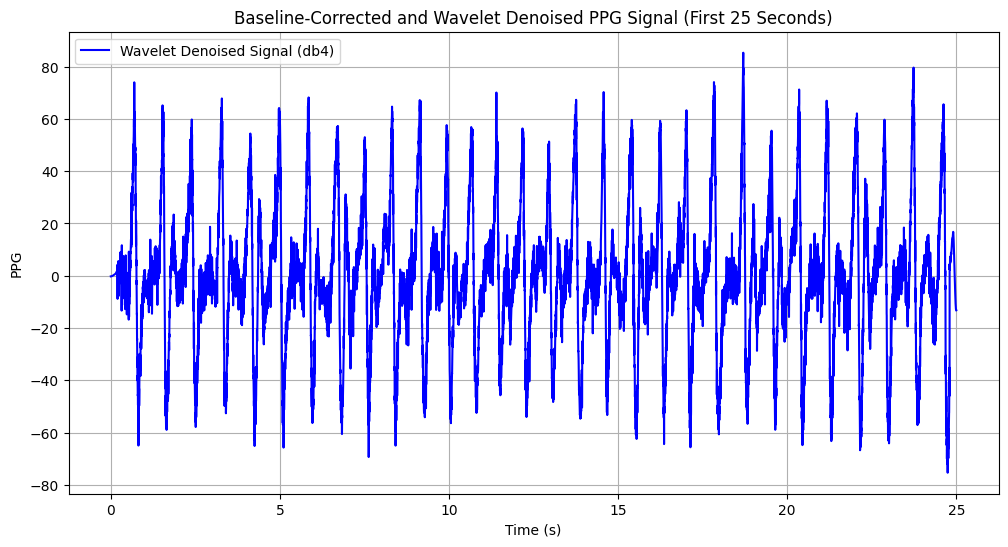

In [48]:
# Plot the baseline-corrected and denoised signal for the first 25 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered[time_column], df_filtered['Denoised_Signal'], label='Wavelet Denoised Signal (db4)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Baseline-Corrected and Wavelet Denoised PPG Signal (First 25 Seconds)')
plt.legend()
plt.grid()
plt.show()


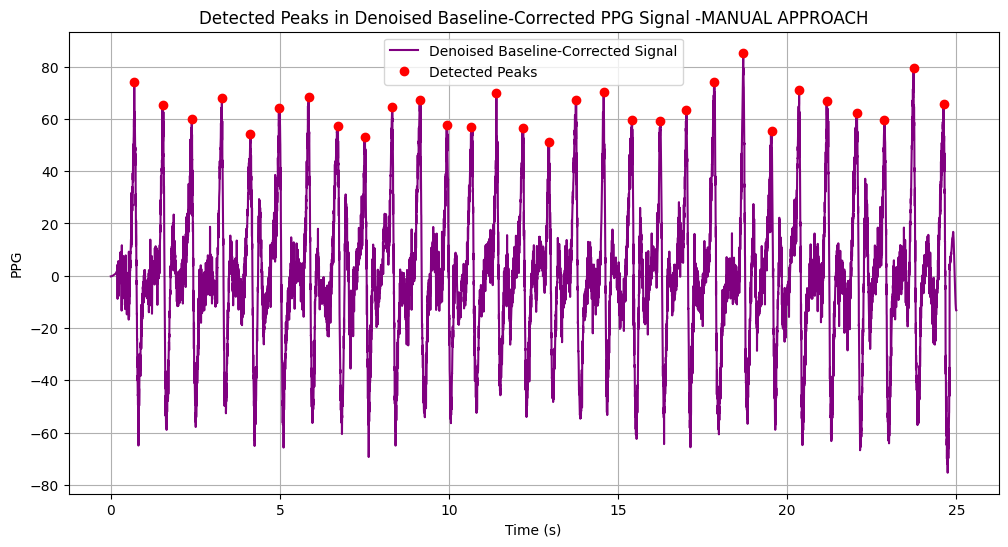

Number of detected peaks in the first 30 seconds: 30


In [57]:
#Approach 1 -- MANUAL
from scipy.signal import find_peaks
# Parameters for peak detection
min_distance = 50  # Minimum distance between peaks, adjust based on data
min_height = 40  # Set this to a higher value to ignore smaller peaks
prominence = 30  # Set prominence to ensure only significant peaks are detected

# Detect peaks in the denoised, baseline-corrected signal with the new parameters
peaks, _ = find_peaks(df_filtered['Denoised_Signal'], distance=min_distance, height=min_height, prominence=prominence)

# Plot the denoised, baseline-corrected signal with detected peaks for the first 30 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Time'], df_filtered['Denoised_Signal'], label='Denoised Baseline-Corrected Signal', color='purple')
plt.plot(df_filtered['Time'].iloc[peaks], df_filtered['Denoised_Signal'].iloc[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Detected Peaks in Denoised Baseline-Corrected PPG Signal -MANUAL APPROACH')
plt.legend()
plt.grid()
plt.show()

# Display the number of detected peaks
print(f"Number of detected peaks in the first 30 seconds: {len(peaks)}")

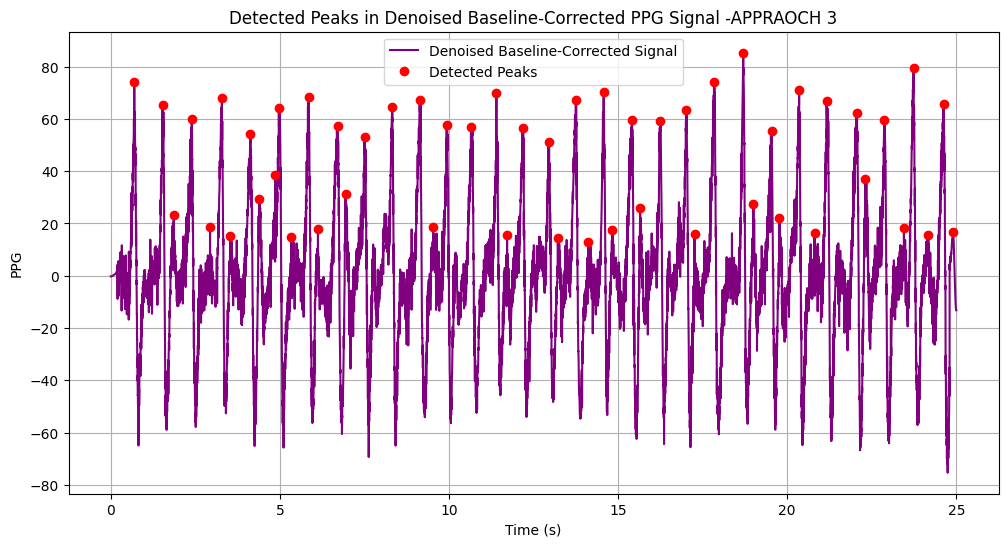

Number of detected peaks in the first 30 seconds: 52


In [59]:
#Approach 3 -- Use a Combination of Mean and Standard Deviation
from scipy.signal import find_peaks
# Parameters for peak detection
min_distance = 50  # Minimum distance between peaks, adjust based on data
prominence = 30  # Set prominence to ensure only significant peaks are detected
signal_mean = df_filtered['Denoised_Signal'].mean()
signal_std = df_filtered['Denoised_Signal'].std()
min_height = signal_mean + 0.5 * signal_std

# Detect peaks in the denoised, baseline-corrected signal with the new parameters
peaks, _ = find_peaks(df_filtered['Denoised_Signal'], distance=min_distance, height=min_height, prominence=prominence)

# Plot the denoised, baseline-corrected signal with detected peaks for the first 30 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Time'], df_filtered['Denoised_Signal'], label='Denoised Baseline-Corrected Signal', color='purple')
plt.plot(df_filtered['Time'].iloc[peaks], df_filtered['Denoised_Signal'].iloc[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Detected Peaks in Denoised Baseline-Corrected PPG Signal -APPRAOCH 3')
plt.legend()
plt.grid()
plt.show()

# Display the number of detected peaks
print(f"Number of detected peaks in the first 30 seconds: {len(peaks)}")

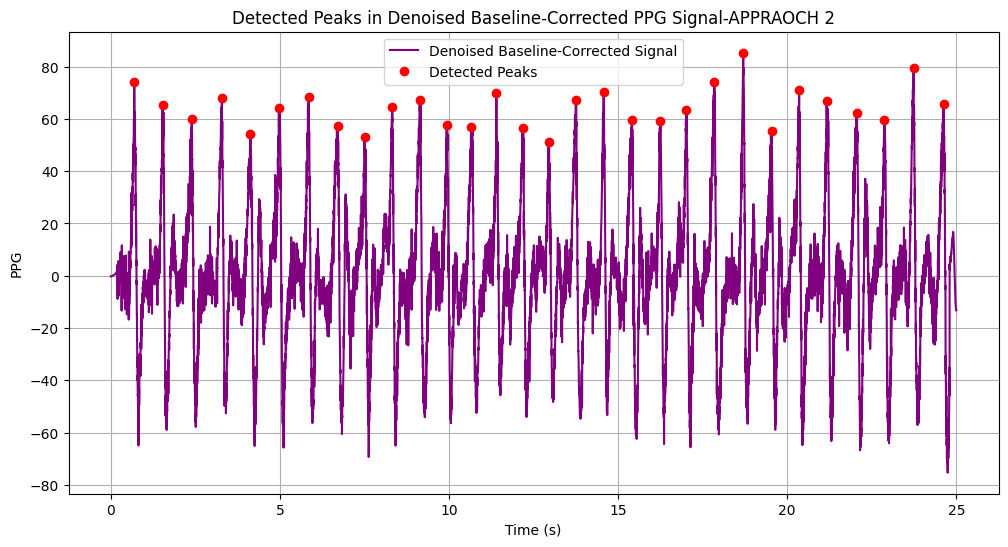

Number of detected peaks in the first 30 seconds: 30


In [61]:
#Approach 2 -- Use a Fraction of the Signal's Maximum Amplitude
from scipy.signal import find_peaks
# Parameters for peak detection
min_distance = 50  # Minimum distance between peaks, adjust based on data
min_height = 0.5 * df_filtered['Denoised_Signal'].max()
prominence = 30  # Set prominence to ensure only significant peaks are detected

# Detect peaks in the denoised, baseline-corrected signal with the new parameters
peaks, _ = find_peaks(df_filtered['Denoised_Signal'], distance=min_distance, height=min_height, prominence=prominence)

# Plot the denoised, baseline-corrected signal with detected peaks for the first 30 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Time'], df_filtered['Denoised_Signal'], label='Denoised Baseline-Corrected Signal', color='purple')
plt.plot(df_filtered['Time'].iloc[peaks], df_filtered['Denoised_Signal'].iloc[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Detected Peaks in Denoised Baseline-Corrected PPG Signal-APPRAOCH 2')
plt.legend()
plt.grid()
plt.show()

# Display the number of detected peaks
print(f"Number of detected peaks in the first 30 seconds: {len(peaks)}")

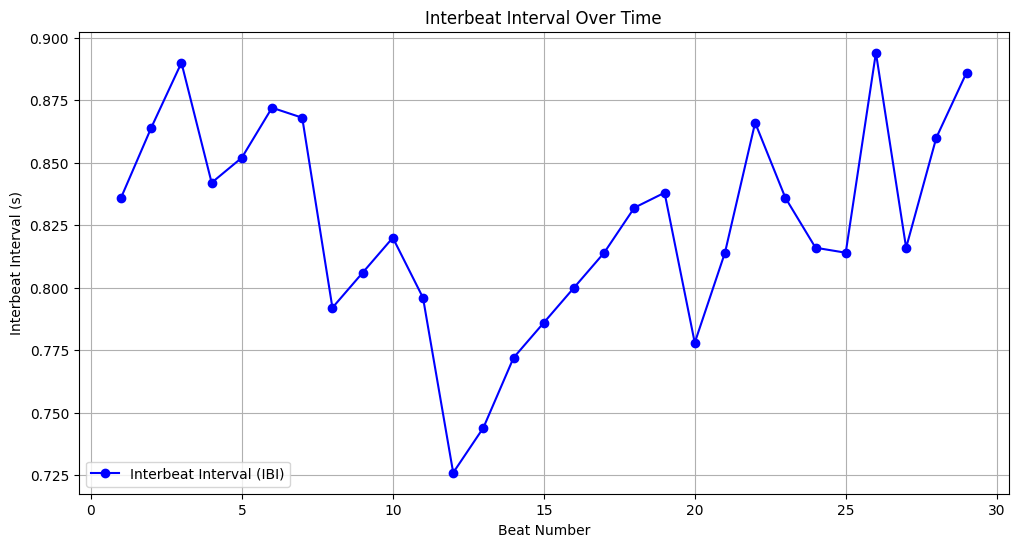

Average Interbeat Interval: 0.83 seconds
Estimated Heart Rate: 72.71 bpm


In [62]:
# Calculate Interbeat Intervals (IBI) from peak indices
def calculate_ibi(time, peak_indices):
    """
    Calculate the interbeat intervals (IBI) from the detected peak indices.

    Parameters:
        time (list or array): The time values corresponding to the PPG signal.
        peak_indices (list): Indices of the detected peaks in the PPG signal.

    Returns:
        list: Interbeat intervals in seconds.
    """
    ibi = []

    for i in range(1, len(peak_indices)):
        # Calculate the time difference between consecutive peaks
        interval = time[peak_indices[i]] - time[peak_indices[i - 1]]
        ibi.append(interval)

    return ibi

# Time values and detected peaks
time_values = df['Time'].values
ibi = calculate_ibi(time_values, peaks)

# Plotting the IBI
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(ibi) + 1), ibi, 'bo-', label='Interbeat Interval (IBI)')
plt.xlabel('Beat Number')
plt.ylabel('Interbeat Interval (s)')
plt.title('Interbeat Interval Over Time')
plt.legend()
plt.grid()
plt.show()

# Calculate and display the average IBI and heart rate
average_ibi = np.mean(ibi)
heart_rate = 60 / average_ibi  # Heart rate in beats per minute (bpm)
print(f"Average Interbeat Interval: {average_ibi:.2f} seconds")
print(f"Estimated Heart Rate: {heart_rate:.2f} bpm")
